Graphics in Python
====

The foundational package for most graphics in Python is [`matplotlib`](http://matplotlib.org), and the [`seaborn`](http://stanford.edu/~mwaskom/software/seaborn/) package builds on this to provide more statistical graphing options. We will focus on these two packages, but there are many others if these don't meet your needs.

There are also several specialized packages that might come in useful:

- [`ggplot`](http://ggplot.yhathq.com) is a port of the R `ggplto2` library to Python
- [`vispy`](http://vispy.org) and [`lightning`](http://lightning-viz.org) for interactive visualization of large data sets
- [`bokeh`](http://bokeh.pydata.org/en/latest/) for web-friendly interactive graphics
- [`pyxley`](pyxley github) and [`spyre`](spyre pyton) for R `shiny` fans
and several others.

Resources
----

- [Matplotlib tutorial](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
- [Matplotlib gallery](http://matplotlib.org/1.2.1/gallery.html)
- [Seaborn gallery](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html#example-gallery)

In [1]:
import warnings
warnings.filterwarnings("ignore")

Matplotlib
----

Matplotlib has a "functional" interface similar to Matlab via the `pyplot` module for simple interactive use, as well as an object-oriented interface that is useful for more complex graphic creations.

Types of plots
----

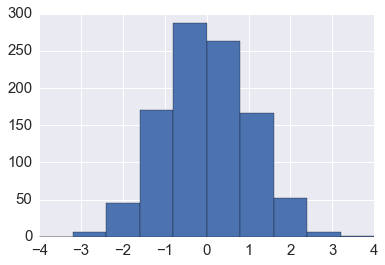

In [2]:
plt.hist(np.random.randn(1000), bins=np.linspace(-4,4,11))
pass

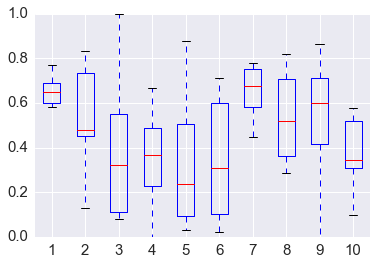

In [3]:
plt.boxplot(np.random.random((6,10)))
pass

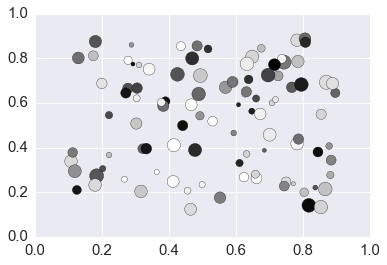

In [4]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100))
pass

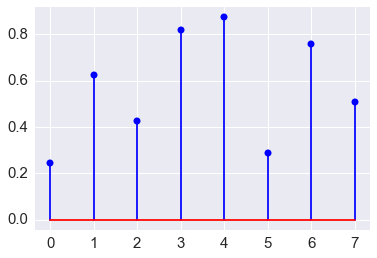

In [5]:
plt.stem(np.random.random(8))
plt.margins(0.05)
pass

In [6]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

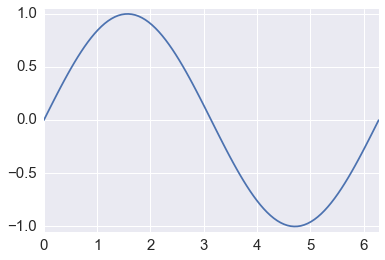

In [7]:
plt.plot(x, y)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
pass

Colors
----

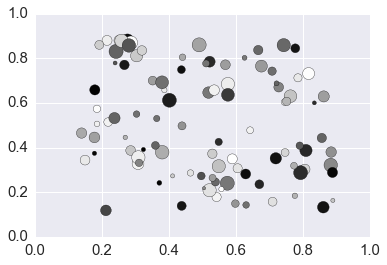

In [8]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100))
pass

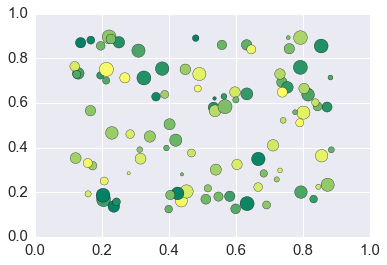

In [9]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100), cmap='summer')
pass

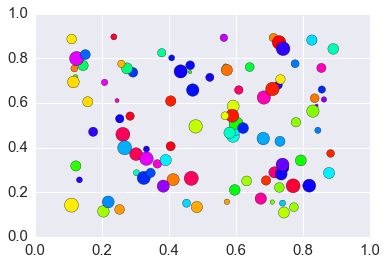

In [10]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100), cmap='hsv')
pass

#### Gettting a list of colors from a colormap

Giving an argument of 0.0 < x < 1.0 to a `colormap` gives the appropriate interpolated color.

In [11]:
# find the bottom, middle and top colors of the winter colormap
colors = plt.cm.winter(np.linspace(0, 1, 3))
colors

array([[ 0.        ,  0.        ,  1.        ,  1.        ],
       [ 0.        ,  0.50196078,  0.74901961,  1.        ],
       [ 0.        ,  1.        ,  0.5       ,  1.        ]])

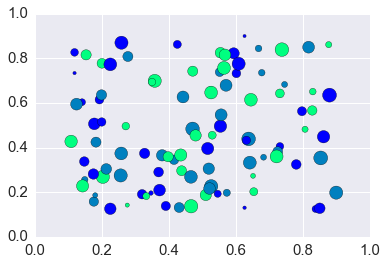

In [12]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=colors)
pass

### Styles

In [13]:
plt.style.available

['seaborn-poster',
 'seaborn-deep',
 'seaborn-notebook',
 'presentation',
 'seaborn-whitegrid',
 'seaborn-talk',
 'classic',
 'seaborn-darkgrid',
 'seaborn-dark-palette',
 'ggplot',
 'seaborn-dark',
 'seaborn-paper',
 'fivethirtyeight',
 'seaborn-ticks',
 'seaborn-muted',
 'seaborn-white',
 'seaborn-colorblind',
 'seaborn-pastel',
 'grayscale',
 'bmh',
 'dark_background',
 'seaborn-bright']

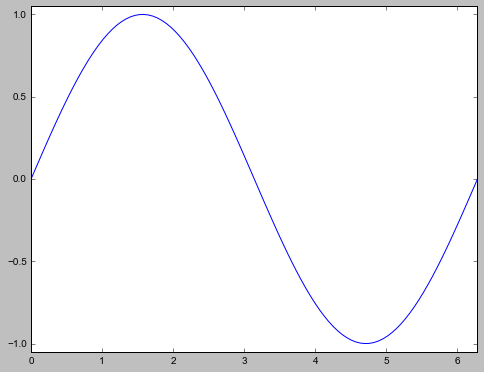

In [14]:
with plt.style.context('classic'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

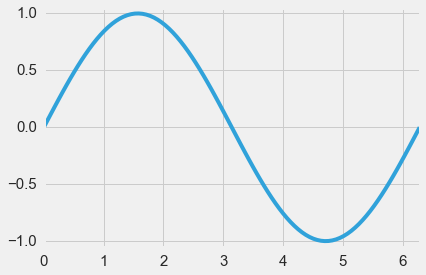

In [15]:
with plt.style.context('fivethirtyeight'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

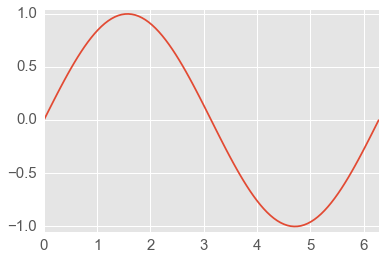

In [16]:
with plt.style.context('ggplot'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

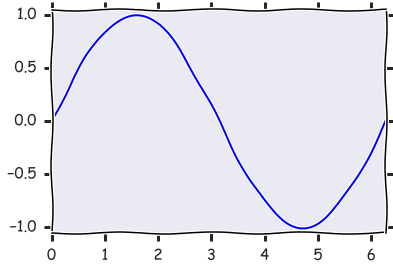

In [17]:
with plt.xkcd():
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

### Creating your onw style

Many, many options can be configured.

In [18]:
plt.rcParams

RcParams({'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.grid.which': 'major',
          'axes.hold': True,
    

In [19]:
%%file foo.mplstyle
axes.grid: True
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16

Overwriting foo.mplstyle


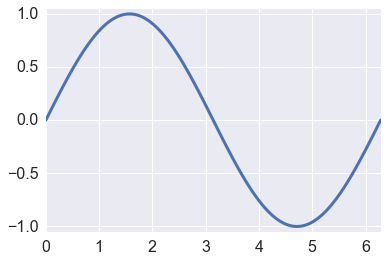

In [20]:
with plt.style.context('foo.mplstyle'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

### Customizing plots

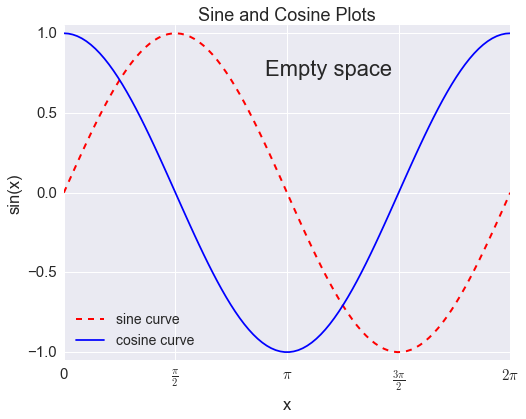

In [21]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
plt.plot(x, y, color='red', linewidth=2, linestyle='dashed', label='sine curve')
plt.plot(x, np.cos(x), 'b-', label='cosine curve')
plt.legend(loc='best', fontsize=14)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xticks([0,0.5*np.pi,np.pi,1.5*np.pi,2*np.pi], 
           [0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.title('Sine and Cosine Plots')
plt.text(0.45, 0.9, 'Empty space', transform=ax.transAxes, ha='left', va='top')
pass

Plot layouts
----

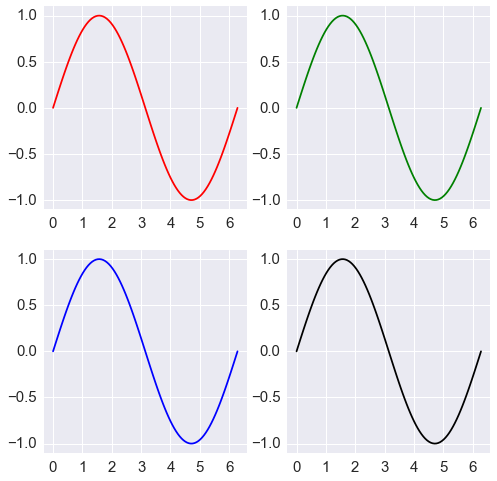

In [22]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0].plot(x,y, 'r')
axes[0,1].plot(x,y, 'g')
axes[1,0].plot(x,y, 'b')
axes[1,1].plot(x,y, 'k')
for ax in axes.ravel():
    ax.margins(0.05)
pass

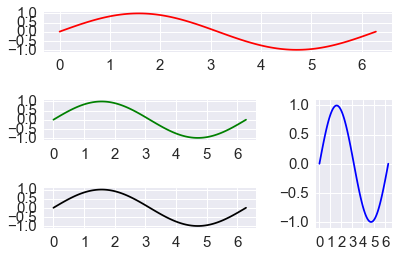

In [23]:
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0), colspan=2)
axes = [ax1, ax2, ax3, ax4]
colors = ['r', 'g', 'b', 'k']
for ax, c in zip(axes, colors):
    ax.plot(x, y, c)
    ax.margins(0.05)
plt.tight_layout()

Seaborn
----

In [24]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [25]:
import numpy.random as rng

#### Density plots

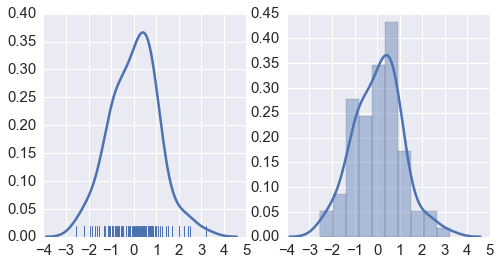

In [26]:
xs = rng.normal(0,1,100)

fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

#### Kernel density estimate

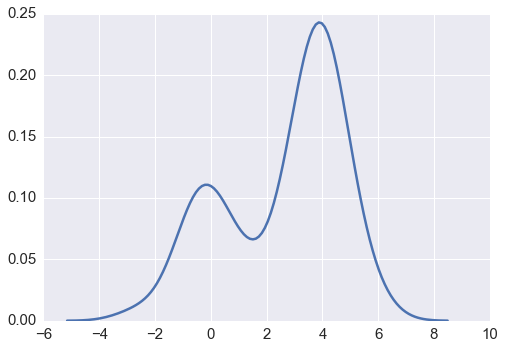

In [27]:
sns.kdeplot(np.r_[rng.normal(0,1,50), rng.normal(4,0.8,100)])
pass

In [28]:
iris = sns.load_dataset('iris')

In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Joint distribution plot

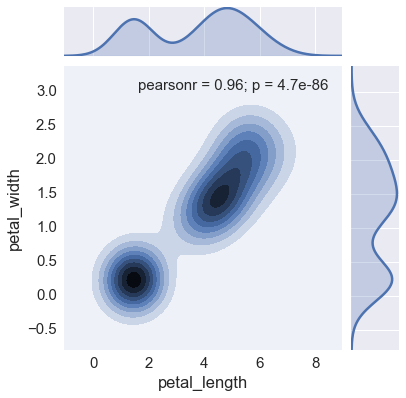

In [30]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='kdeplot')
pass

#### Box and violin plots

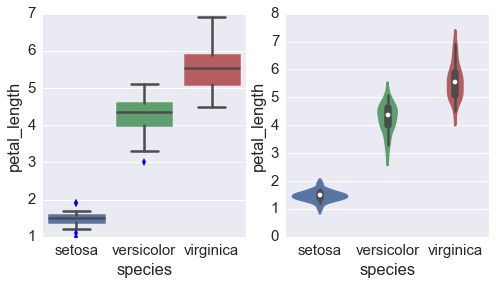

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.boxplot(x='species', y='petal_length', data=iris, ax=axes[0])
sns.violinplot(x='species', y='petal_length', data=iris, ax=axes[1])
pass

### Composite plots

In [32]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)

In [33]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
sns.set_context('notebook', font_scale=1.5)

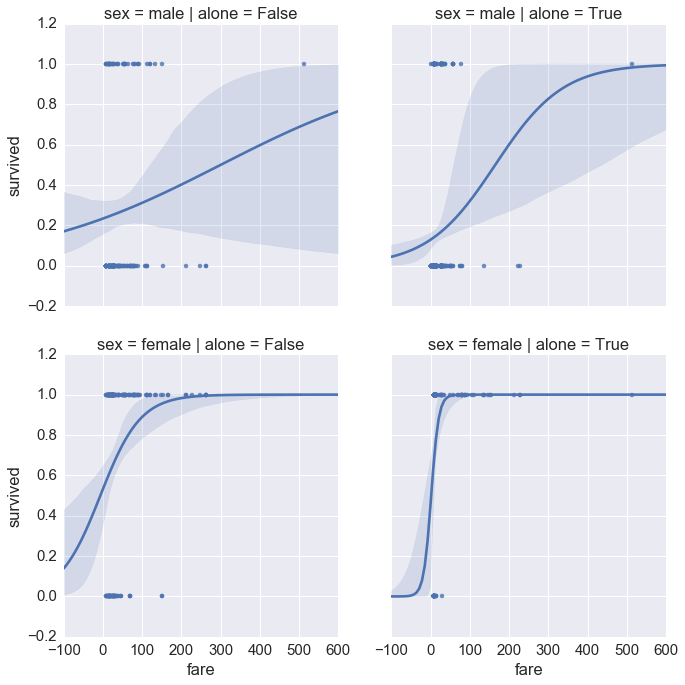

In [35]:
sns.lmplot(x='fare', y='survived', col='alone', row='sex', data=titanic, logistic=True)
pass

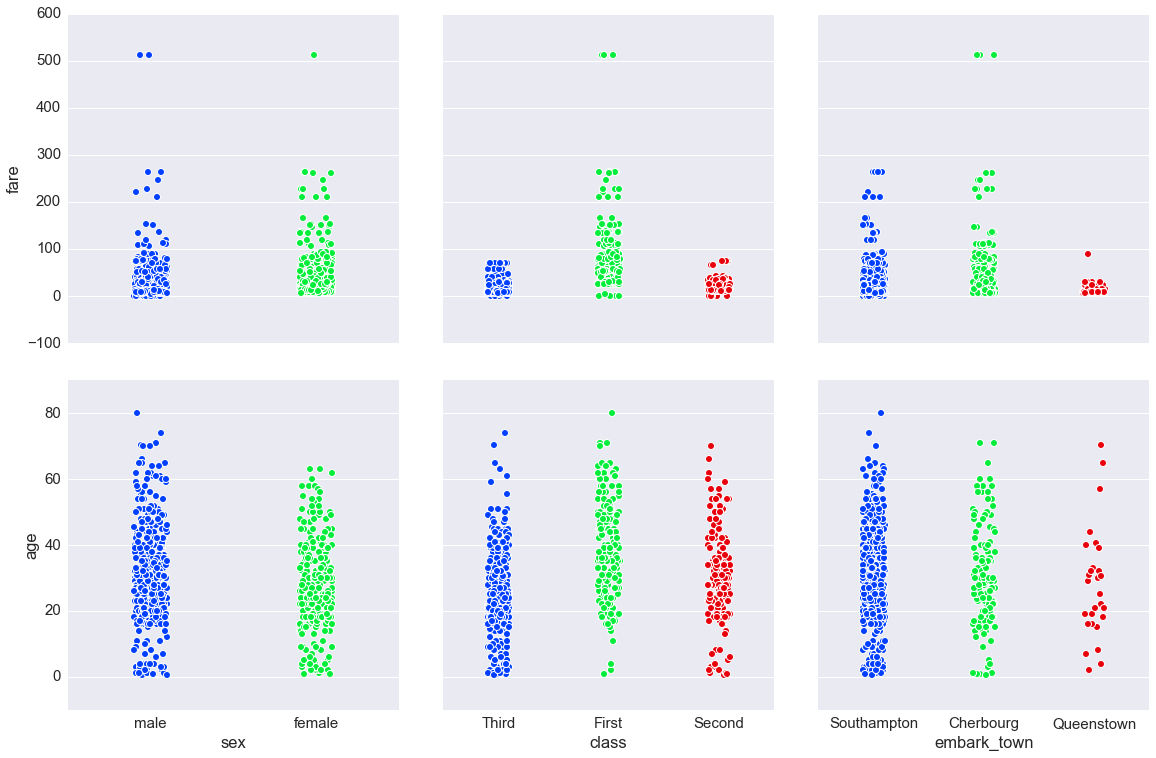

In [36]:
g = sns.PairGrid(titanic,
                 y_vars=['fare', 'age'],
                 x_vars=['sex', 'class', 'embark_town' ],
                 aspect=1, size=5.5)
g.map(sns.stripplot, jitter=True, palette="bright")
pass

Using `ggplot` as an alternative to `seaborn`.
----

The `ggplot` module is a port of R's `ggplot2` - usage is very similar except for the following minor differences:

- Pass in a `pandas` dataframe
- aethetics comes befor data in the argument list ot ggplot
- Give column names and other arugments (e.g.. function to call) as strings
- You need to use the line continuation character `\` to extend over multiple lines

Only the most elementary examples are shown below. The `ggplot` module is extremely rich and sophisticated with a steep learning curve if you're not already familiar with it from R. Please see [documentation](http://ggplot.yhathq.com/docs/index.html) for details. 

In [37]:
from ggplot import *

#### Interacting with R

In [38]:
%load_ext rpy2.ipython

#### Note that we are exporting the R `mtcars` dataframe to Python (converts to `pandas` DataFrame)

In [39]:
%R -o mtcars

In [40]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


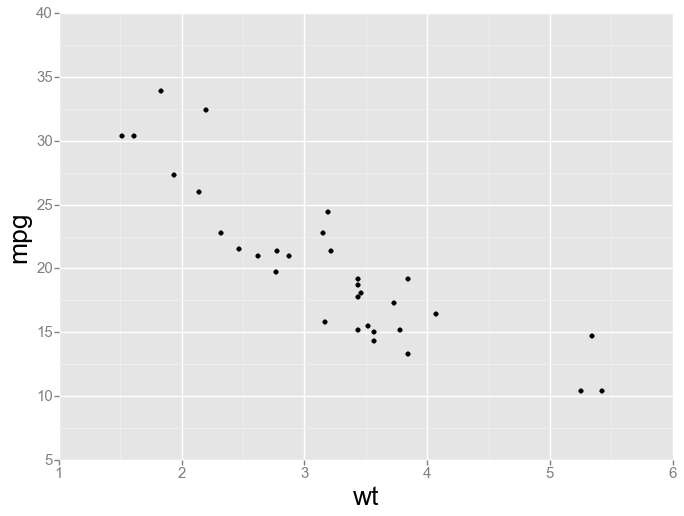

<ggplot: (-9223372036562763015)>

In [41]:
ggplot(aes(x='wt', y='mpg'), data=mtcars,) + geom_point()

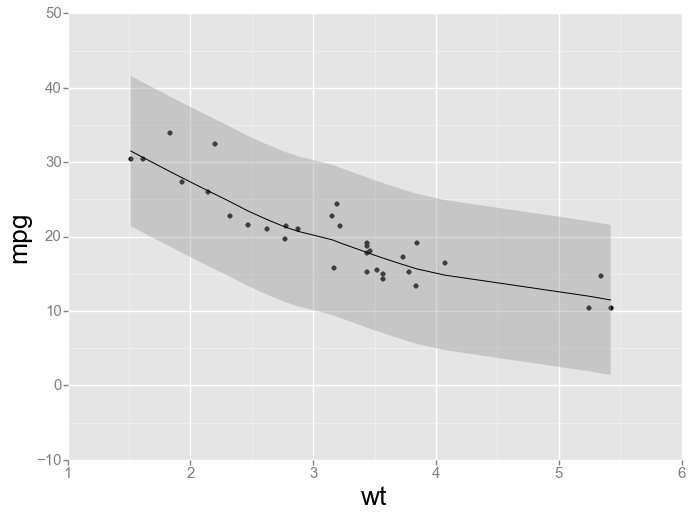

<ggplot: (-9223372036566408020)>

In [42]:
ggplot(aes(x='wt', y='mpg'), data=mtcars) + geom_point() + geom_smooth(method='loess')

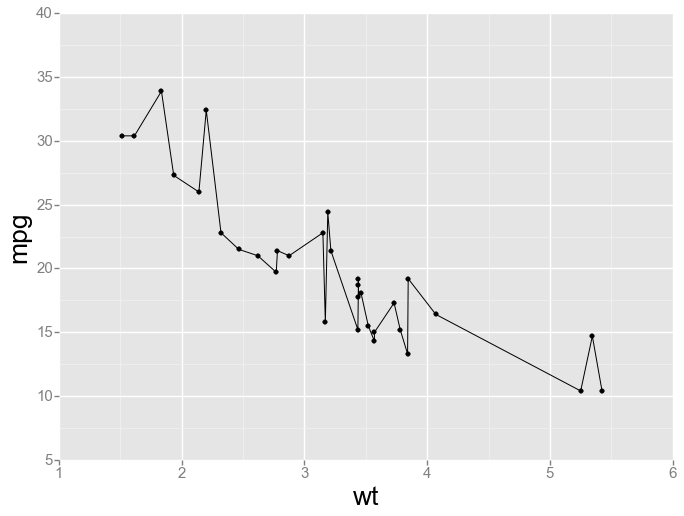

<ggplot: (274216445)>

In [43]:
ggplot(aes(x='wt', y='mpg'), data=mtcars) + geom_point() + geom_line()

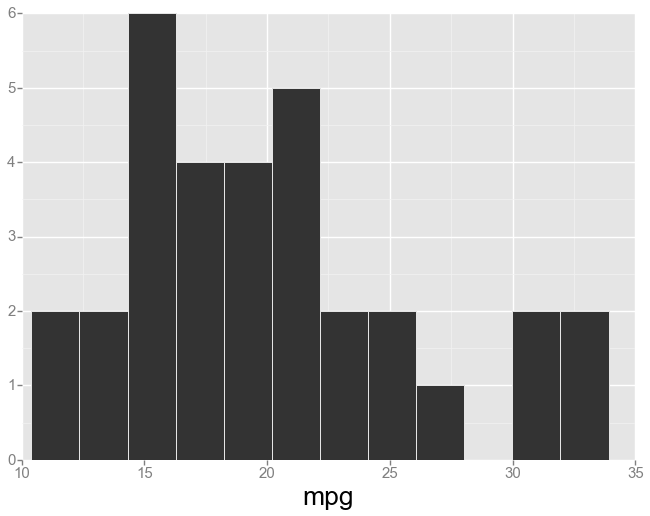

<ggplot: (292017812)>

In [44]:
ggplot(aes(x='mpg'), data=mtcars) + geom_histogram(binwidth=2)

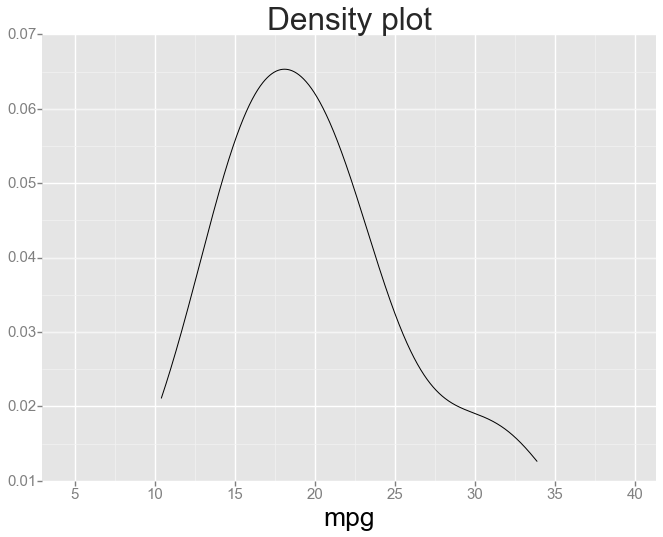

<ggplot: (-9223372036567498485)>

In [45]:
ggplot(aes(x='mpg'), mtcars) + \
geom_line(stat="density") + \
xlim(2.97, 41.33) + \
labs(title="Density plot")

### Use `ggplot` in R directly with %R magic

In [46]:
cars = mtcars

#### Note that we pass in Python variables with the `-i` optin and using the %%R cell magic

In [47]:
%%R -i cars
ggplot(cars, aes(x=mpg, y=am)) +
geom_point(position=position_jitter(width=.3, height=.08), shape=21, alpha=0.6, size=3) +
stat_smooth(method=glm, family=binomial, color="red")


Error in withVisible({ : could not find function "ggplot"


Version Information
----

In [48]:
%load_ext version_information
%version_information numpy, matplotlib, seaborn

Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.0.1
OS Darwin 15.3.0 x86_64 i386 64bit
numpy 1.10.4
matplotlib 1.5.0
seaborn 0.6.0
Mon Feb 01 09:52:50 2016 EST